In [88]:
from downloadModelNet import ModelNet, downloadModelNet
import torch

# download the ModelNet10 dataset
# this may take around 10 minutes to process the data
downloadModelNet(nx=31)

Generating labels and preprocessing data


In [96]:
# initialize the dataset
train = ModelNet()
test = ModelNet(train=False)
print(len(train))
print(len(test))

3991
908


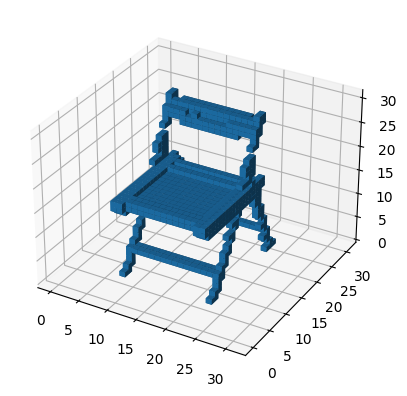

In [90]:
import matplotlib.pyplot as plt

# plot a sample image
img = train[1299][0]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.voxels(img[0])
plt.show()

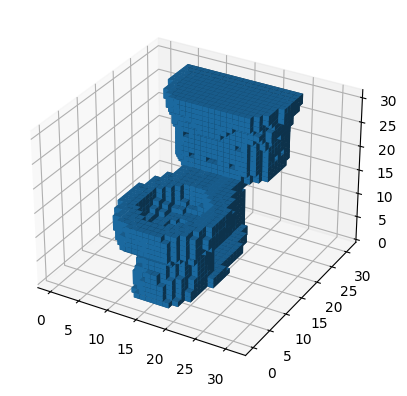

In [92]:
# plot a sample image from the test dataset
img = test[900][0]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.voxels(img[0])
plt.show()

In [93]:
# define spatial coarsening and refinement functions
def coarsen(img):
    nx = img.shape[2]
    nxc = (nx + 1) // 2 - 1
    return torch.nn.functional.interpolate(img, [nxc, nxc, nxc], mode='trilinear', align_corners=False)

def refine(img):
    nx = img.shape[2]
    nxf = (nx + 1) * 2 - 1
    return torch.nn.functional.interpolate(img, [nxf, nxf, nxf], mode='trilinear', align_corners=False)

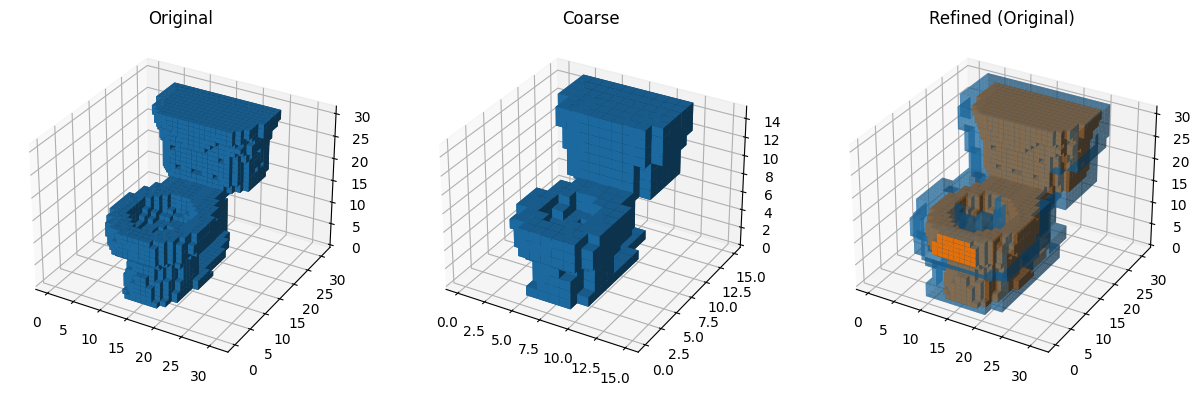

In [98]:
# coarsen and refine a sample image
img = test[900][0]
img = torch.unsqueeze(img, 0)
coarse = coarsen(img)
refined = refine(coarse)

# plot coarse, original, and refined
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.voxels(img[0][0])
ax.set_title("Original")
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.voxels(coarse[0][0])
ax.set_title("Coarse")
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.voxels(refined[0][0], alpha=0.5)
ax.voxels(img[0][0])
ax.set_title("Refined (Original)")
plt.show()

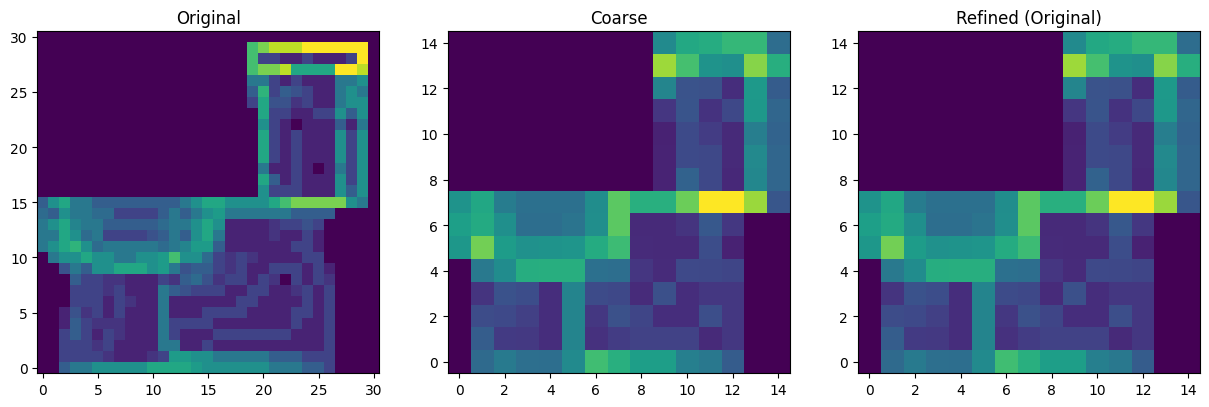

In [104]:

# coarsen and refine a sample image
from matplotlib import transforms

# img = train[rand_index][0]
img = test[900][0]
img = torch.unsqueeze(img, 0)
coarse = coarsen(img)
refined = refine(coarse)

tr = transforms.Affine2D().rotate_deg(-90)

dim = 0
# plot coarse, original, and refined
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(torch.sum(img[0][0], dim=dim).T, origin='lower')
ax.set_title("Original")

ax = fig.add_subplot(1, 3, 2)
ax.imshow(torch.sum(coarse[0][0], dim=dim).T, origin='lower')
ax.set_title("Coarse")

ax = fig.add_subplot(1, 3, 3)
ax.imshow(torch.sum(coarse[0][0], dim=dim).T, origin='lower')
ax.set_title("Refined (Original)")
plt.show()